<a href="https://colab.research.google.com/github/Txlu-OG/Learn/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment Simple machine Learning Project cycle**

### **_House Price Prediction Using California Housing Data_**
This dataset provides information about house prices in California. House Price Prediction

---


The following is a description of each column in the dataset:

Dataset Features (California Housing):
* MedInc: Median income in block group
* HouseAge: Median house age in block group
* AveRooms: Average number of rooms per household
* AveBedrms: Average number of bedrooms per household
* Population: Block group population
* AveOccup: Average number of household members
* Latitude: Block group latitude
* Longitude: Block group longitude
* MedHouseVal (Target): Median house value in block group




,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Dataset Description:
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - Ave

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


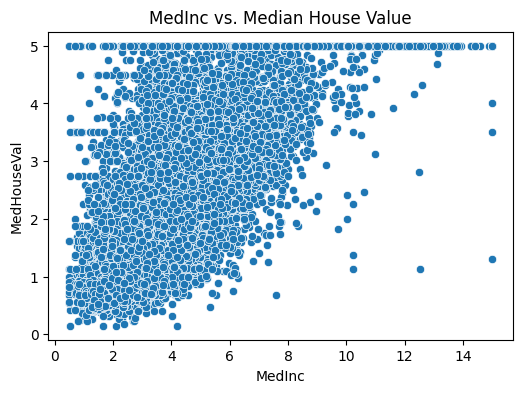

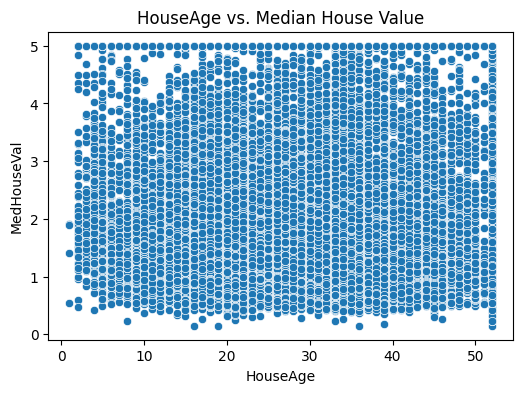

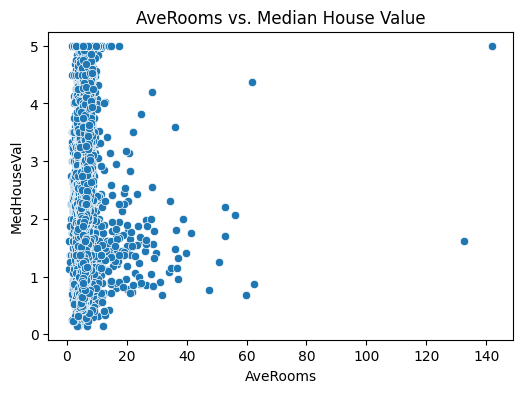

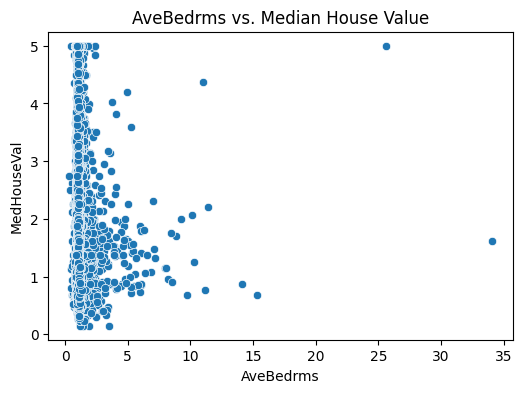

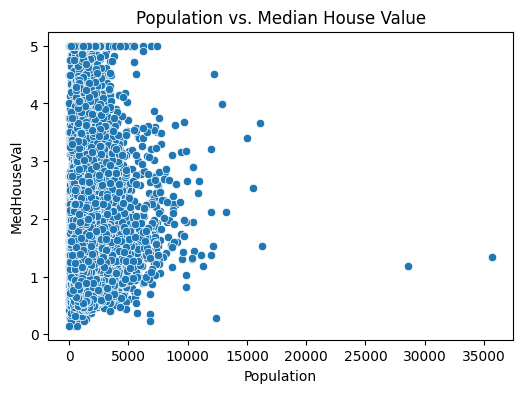

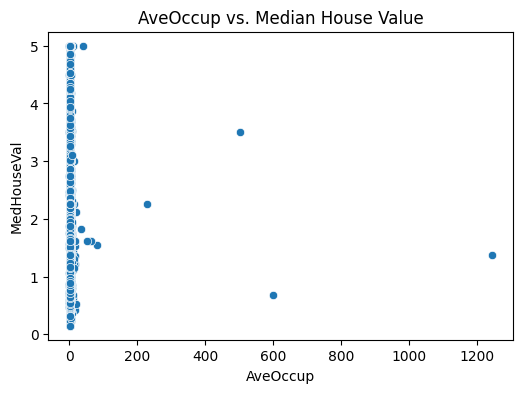

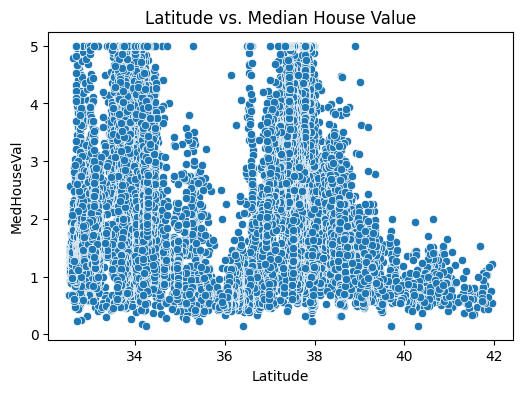

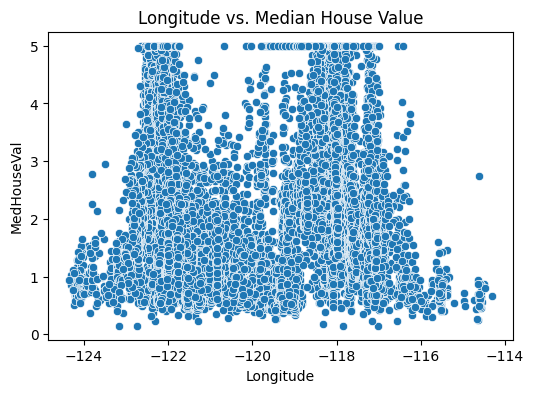

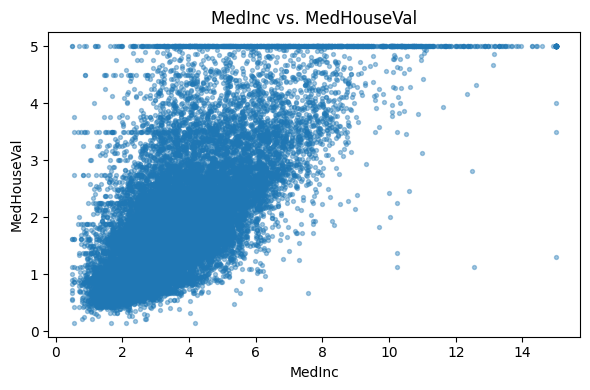

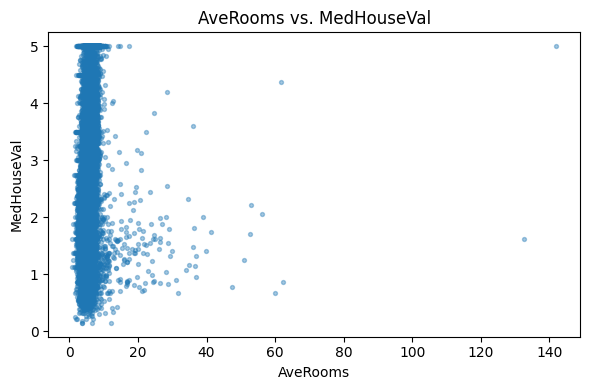

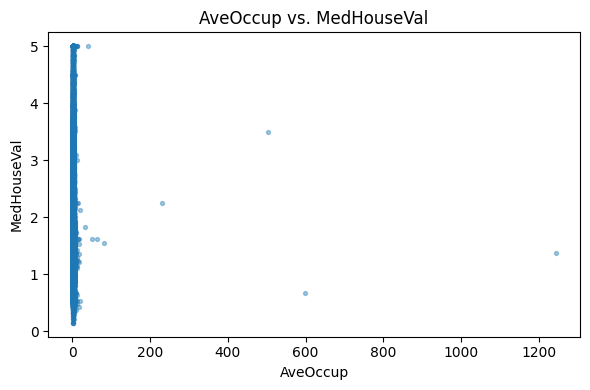

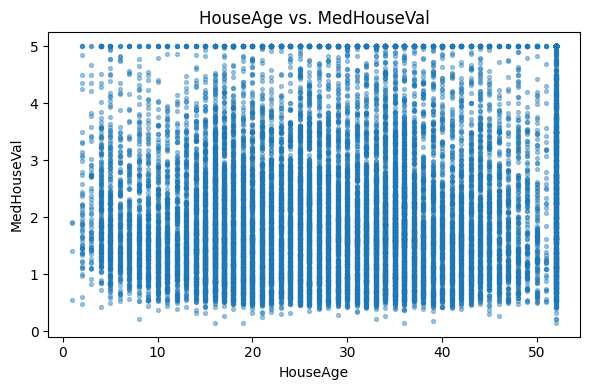


Root Mean Squared Error: 0.7456
R-squared: 0.5758

Predicted Median House Value for sample: 1.5487


In [3]:
# --- Imports ---
# Import all the necessary libraries for data handling, visualization, and model building.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Data Collection and Loading ---
# TODO: Load the 'California Housing' dataset from sklearn and convert it into a pandas DataFrame.

# Hint: Use `fetch_california_housing()` from `sklearn.datasets`

# Load dataset and convert to DataFrame:

# Add your code here:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# --- Quick Check of Data ---
# TODO: Display the first few rows of the dataset to understand its structure.
# Hint: Use `.head()` to inspect the first few rows.

# Add your code here:
display(df.head())

# TODO: Check the features and target variable. Identify which is continuous and categorical if applicable.
# Hint: Use `.info()` and `.describe()` to inspect data types and statistical properties.

# Add your code here:
print("Dataset Info:")
df.info()
print("\nDataset Description:")
print(housing.DESCR)

print("\nDataset Description:")
display(df.describe())

# --- EDA and Data Preprocessing ---
# TODO: Check for missing/null values.
# Hint: Use `.isnull().sum()` to check for null values.

# Add your code here:
print("Missing values in each column:")
print(df.isnull().sum())

# TODO: Visualize the data. Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).
# Example: Use `plt.scatter()` to visualize the relationship between 'MedInc' and 'MedHouseVal'.

# Add your code here:
# Plotting all features against MedHouseVal
features = housing.feature_names
for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['MedHouseVal'])
    plt.title(f"{feature} vs. Median House Value")
    plt.xlabel(feature)
    plt.ylabel('MedHouseVal')
    plt.show()


# TODO: Create a function to automate scatter plots for all features vs MedHouseVal.
# Hint: The function should loop over a list of features and plot scatter plots for each.

# Define your function here:
# Function to automate scatter plots for a provided list of features vs MedHouseVal.
def plot_features_vs_target(df, feature_list, target='MedHouseVal'):
    """
    Plot simple scatter charts of each feature in feature_list against the target column.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame containing the features and target.
    feature_list : list of str
        Feature names to plot against the target.
    target : str
        Target column name in df.
    """
    for f in feature_list:
        if f not in df.columns:
            print(f"Warning: '{f}' not found in DataFrame columns, skipping.")
            continue
        plt.figure(figsize=(6, 4))
        plt.scatter(df[f], df[target], s=8, alpha=0.4)
        plt.title(f"{f} vs. {target}")
        plt.xlabel(f)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()


# TODO: Use the function to visualize the relationships between multiple features and the target variable.
# Features: ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
# Target: 'MedHouseVal'

# Add your code here:

# Use the function to visualize selected relationships.
selected_features = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
plot_features_vs_target(df, selected_features, target='MedHouseVal')

# --- ML Model Training ---
# TODO: Split the dataset into training and testing sets.
# Hint: Use `train_test_split()` from `sklearn.model_selection` with an 80/20 split.

# Define X (features) and y (target) and perform the train-test split:


# TODO: Choose an appropriate regression model.
# Hint: Use `LinearRegression()` from `sklearn.linear_model`.

# Define your regression model here:


# TODO: Train the model on the training data.
# Hint: Use `.fit()` to train the model.

# Add your code here:
X = df[features]
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


# --- Model Evaluation ---
# TODO: Evaluate the performance of the model on the test set using relevant metrics (e.g., RMSE, R-squared).
# Hint: Use `mean_squared_error()` and `r2_score()` from `sklearn.metrics`.

# Predict on the test set and calculate the evaluation metrics:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nRoot Mean Squared Error: {rmse:.4f}")
print(f"R-squared: {r2:.4f}")


# --- Model Prediction ---
# TODO: Predict Median House Value from a new set of feature inputs.
# Example new data: 'MedInc' = 3, 'HouseAge' = 30, 'AveRooms' = 6, 'AveOccup' = 3, 'Latitude' = 34, 'Longitude' = -118, 'AveBedrms' = 1, 'Population' = 1500
# Hint: Use `.predict()` on a new data array.

# Add your prediction code here:
# Example: Predict for a new observation (edit values as needed)
sample_values = [3.0, 30.0, 6.0, 1.0, 1500.0, 3.0, 34.0, -118.0]
sample_df = pd.DataFrame([sample_values], columns=features)
sample_pred = model.predict(sample_df)
print(f"\nPredicted Median House Value for sample: {sample_pred[0]:.4f}")